# Diffraction par Rayons-X

Lorsque des rayons sont envoyés sur un cristal et si la longueur d'onde est de l'ordre des dimensions de la maille du cristal (typiquement 1A-2A, donc des rayons-X), ceux-ci sont diffractés et subissent des interférences dûes à la structure du cristal. Certaines directions présenteront des interférences constructives dont on pourra mesurer expérimentalement l'intensité de l'onde diffractée. Mesurer dans toutes les directions permet de réaliser un **diffractogramme** dont on va se servir afin d'obtenir toutes les informations de la structure cristalline (motif et réseau). Dans ce notebook sera étudié les trois premiers pics du diffractogramme du cristal CdBr2 pour un rayonnement [$Cu-K\alpha$](http://gisaxs.com/index.php/Cu_K-alpha) correspondant à une **longueur d'onde  de 1.54060Å**.

In [1]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from pymatgen.util.plotting import pretty_plot

# Permet d'utiliser l'interface du MP
with MPRester("2r9TvKUOgDsTx87F")as mpr:
    
    # Permet d'obtenir l'objet 'structure' sur le MP
    structure = mpr.get_structure_by_material_id("mp-568690")
    new_s=SpacegroupAnalyzer(structure).get_primitive_standard_structure()
    
    # Crée un objet permettant de convertir la structure en fichier cif
    cwsym=CifWriter(structure,0.1) # Maille hexagonale
    cwsym.write_file("CdBr2sym")
    cwprim=CifWriter(new_s)     #Maille primitive
    cwprim.write_file("CdBr2prim")
       

## Diffraction dans un cristal
Lorsque les rayons-X intéragissent avec le cristal, l'intensité des rayons diffractés va principalement dépendre de deux paramètres:
* Le réseau cristallin: Les interférences constructives ne vont apparaître que pour certaines directions du rayon incident tandis que pour les autres directions l'amplitude du rayon diffracté sera nulle. Cette condition est géométrique et est formulée mathématiquement par la **loi de Bragg** 

* Le contenu de la maille: Même si les ondes diffusées repectent la loi de Bragg elles interfèrent également avec les atomes présents dans chaque maille induisant une diminution de son intensité. L'intensité résultante sera donc modélisée par le **facteur de structure** de la maille


### Loi de Bragg

Condition nécessaire à l'apparition de pics sur le diffractogramme, elle vient du fait que les rayons incidents sont considérés comme réfléchis par une même famille ${hkl}$ de plans réticulaires. Celà engendre un déphasage entre les ondes réfléchies dont les interférences seront constructives dans certaines conditions donnée par la loi de Bragg:

**Loi de Bragg:** $n\lambda =2d_{hkl}sin\theta$

* $\lambda$: Longueur d'onde du rayon-X
* $\theta$: Angle formé par le plan réticulaire et le rayon incident (ou réfléchi)
* $d_{hkl}$: Distance minimale entre deux plan d'une même famille
* $n$: Nombre entier, appelé aussi "ordre de la réflexion"



### Facteur de structure

Le facteur de structure $S_k$ permet de calculer l'intensité du rayon diffracté (si la loi de Bragg est respectée) et est donné par:

$S_K=\sum_{j=1}^N f_j(K)e^{iK.r'_j}$ où $N$ est le nombre d'atomes dans la maille primitive.

* $K$: Vecteur de diffusion avec $K=k'-k$ où $k$ représente le vecteur d'onde du rayon incident et $k'$ celui du rayon diffusé
* $f_j$: Facteur de forme atomique de l'atome d'indice j de la maille primitive, sa valeur dépend notamment du vecteur de diffusion $K$ et de la densité des charges électroniques autour du noyau de l'atome.
* $r'_j$: Position de l'atome d'indice j dans la maille primitive centrée en (0,0,0)

En conclusion, la position des pics sur un diffractogramme sera déterminée par la condition de Bragg et l'intensité par le facteur de structure tel que $I=|S_K|^2$.

## Analyse des pics du diffractogramme

Le diffractogramme correspondant au cristal est donné ci-dessous:

Text(0, 0.5, 'Intensities (scaled)')

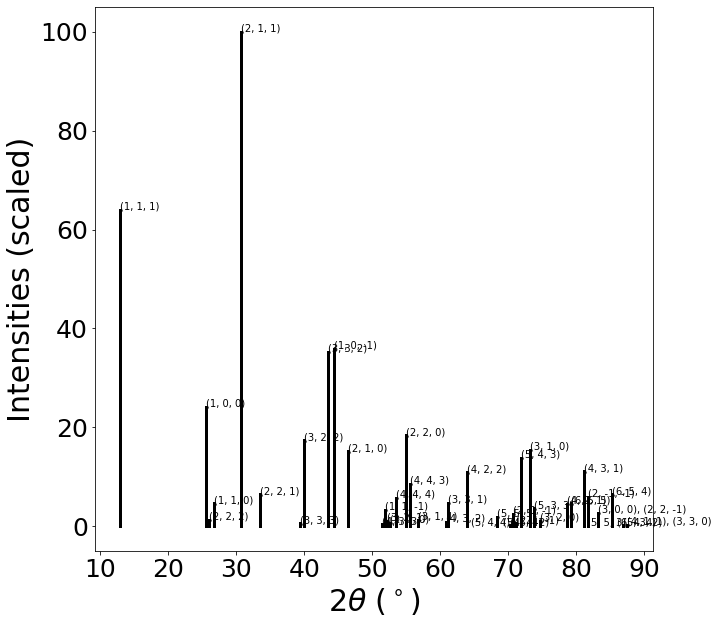

In [7]:
 #Permet d'obtenir les informations relatives au diffractogramme et affiche celui-ci
xrd=XRDCalculator(1.54060)
xrdpatt=xrd.get_pattern(new_s)

#theta=xrdpatt.x 
#Int=xrdpatt.y
#dhkl=xrdpatt.d_hkls

#Plans=xrdpatt.hkls
#for i in range(len(Plans)):
   # Plans[i]=Plans[i][0]['hkl']

#plot=xrd.get_plot(new_s)

 
plt = pretty_plot(10, 10)
ax = plt.gca()
      

for two_theta, i, hkls, d_hkl in zip(xrdpatt.x, xrdpatt.y, xrdpatt.hkls, xrdpatt.d_hkls):
    if 0 <= two_theta <= 90:
        label = ", ".join([str(hkl["hkl"]) for hkl in hkls])
        ax.plot([two_theta, two_theta], [0, i], color='k',
                linewidth=3, label=label)
        
        ax.annotate(label, xy=[two_theta, i],
                    xytext=[two_theta, i], fontsize=10)


ax.set_xlabel(r"$2\theta$ ($^\circ$)")
ax.set_ylabel("Intensities (scaled)")


Il est également à noter que le [module](https://pymatgen.org/pymatgen.analysis.diffraction.xrd.html) de la librairie pymatgen permettant d'analyser la diffraction rayons-X ajoute la [correction de polarisation de Lorentz](https://dictionary.iucr.org/Lorentz%E2%80%93polarization_correction) pour calculer l'intensité des pics.


In [ ]:
 #1er Pic de diffraction
    deth1=xrdpatt.x[0]
    I1=xrdpatt.y[0]
    Plan1=xrdpatt.hkls[0]
    Plan1=Plan1[0]['hkl']
    d1=xrdpatt.d_hkls[0]
    
    #2e Pic de diffraction
    deth2=xrdpatt.x[1]
    I2=xrdpatt.y[1]
    Plan2=xrdpatt.hkls[1]
    Plan2=Plan2[0]['hkl']
    d2=xrdpatt.d_hkls[1]
    #3e Pic de diffraction
    deth3=xrdpatt.x[2]
    I3=xrdpatt.y[2]
    Plan3=xrdpatt.hkls[2]
    Plan3=Plan3[0]['hkl']
    d3=xrdpatt.d_hkls[2]


In [ ]:
print(xrdpatt.x)
print(xrdpatt.y)
print(xrdpatt.hkls)
print(dhkl)